# Homework 2   Group S 

####     Silvia Schmid   (482825)      
####     Lea Schwalb     (406994) 
####     Geuhan Kim      (4043225)   
####     Andreas Kandolf (491344)       
####    Louise Sertic   (???)         
                                  

# Aufgabe 1

In [1]:
import numpy as np
import scipy as sc 
import pyfar as pf 
import matplotlib.pyplot as plt


In [183]:
def plot_system(system, fs=2*np.pi, N=2048, color="k"):
    """ plots the pole-zero diagram, magnitude response, phase response, and group delay of a system.
    system variables can be entered as tuple ((b coefficients),(a coefficients)) or ((zeros),(poles),(gain))
    additional arguments are the samplingrate "fs" (default ist 2pi), the integer amount of frequency bins "N" (default is 2048) 
    and the color of the plots (default is "k"). Attention! the SciPi functions need iterables to function. So if ganins or zeros
    are single valued, enter ((value,)(value,)(gain)) """
    



    ### the function should add missing poles or zeros if nescessary --> ????   #######
    ### jede (?) z-trafo hat bei z = 0  ( 1/z) iwelche extremstellen



    # Eingaben in Variablen aufnehmen
    fs = fs 
    N = N 
    color = color

    # System in verschiedene Darstellungen umrechen

    if len(system) == 2: 
        numerator = np.array(system[0])
        denominator = np.array(system[1])
        zeros, poles, gain = sc.signal.tf2zpk(numerator, denominator)
        zeros = np.array(zeros)
        poles = np.array(poles)
        gain = np.array(gain)


    elif len(system) == 3: 
        zeros = np.array(system[0])
        poles = np.array(system[1])
        gain = np.array(system[2])
        numerator, denominator = sc.signal.zpk2tf(zeros,poles,gain)

    else: 
        raise ValueError("Error: System variable needs to be in the format: ((b coefficients),(a coefficients)) or ((zeros),(poles),(gain))")
    
    # Check for multi zeros 
    multizero=[]
    if zeros.shape[0] > len(set(zeros)):
        zerolist = zeros.tolist()        
        for zero in zerolist:
            multizero.append(zerolist.count(zero))

    # Check for multi poles
    multipole = []
    if poles.shape[0] > len(set(poles)):
        polelist = poles.tolist()
        for pole in polelist:
            multipole.append(polelist.count(pole))


    # Calculate Transfer function tff: 
    freq, tf = sc.signal.freqz(numerator, denominator, fs= fs)

    # calculate magnitude 
    magnitude = np.abs(tf)

    # calculate phase 
    phase =np.angle(tf)

    # calculate group velocity ( => - delta phi / delta omega)
    group_vel = -np.diff(phase)/np.diff(2*np.pi*freq) 


    # Plots
    fig, axs = plt.subplots(3, 2, gridspec_kw={'height_ratios': [2, 2, 2], 'width_ratios': [1, 3]}, figsize=(10, 8))
    plt.suptitle("System properties", fontsize = 26)

    # z-Ebenen-Plot erstellen
    axs[1,0].scatter(zeros.real, zeros.imag, color = color, marker="o", linewidth=0.1)
    axs[1,0].scatter(poles.real, poles.imag, color= color, marker = "x")
    circle = plt.Circle((0, 0), 1, fill=False, color='grey', linestyle='dashed', linewidth=1, label='Einheitskreis', alpha = 0.5)
    axs[1,0].add_patch(circle)
    axs[1,0].set_title("Pole-Zero Diagram", fontsize = 15 )
    axs[1,0].axhline(0, color='grey', alpha = 0.5)
    axs[1,0].axvline(0, color='grey', alpha = 0.5)
    axs[1,0].grid(True, alpha= 0.3)
    xy_lim = np.max(np.abs(np.concatenate((poles.flatten(), zeros.flatten())))) + .5
    axs[1,0].set_xlim(-xy_lim, xy_lim)
    axs[1,0].set_ylim(-xy_lim, xy_lim)
    axs[1,0].set_xlabel("Re{z}")
    axs[1,0].set_ylabel("Im{z}")

    # Doppelnullen / Polstellen kennzeichnen

    for i, value in enumerate(multizero):
        if value > 1: 
            axs[1,0].text(zeros[i].real + .1, zeros[i].imag + 0.1, str(multizero[i]), fontsize=8, ha='center', va='center')
    
    
    for i, value in enumerate(multipole):
        if value > 1: 
            axs[1,0].text(poles[i].real + .1, poles[i].imag + .1, str(multipole[i]), fontsize=8, ha='center', va='center')


    # unnötige koordinatensysteme löschen
    axs[0,0].remove()
    axs[2,0].remove()

    # Magnitude Plot 
    axs[0,1].plot(freq, magnitude, color = color)
    #axs[0,1].set_title("Magnitude Response")
    #axs[0,1].set_xlabel("Frequency in Rad")
    axs[0,1].set_ylabel("Magnitude in N/A")

    # Phase Plot
    axs[1,1].plot(freq, phase, color = color)
    #axs[1,1].set_title("Phaseresponse")
    #axs[1,1].set_xlabel("Frequency in Rad")
    axs[1,1].set_ylabel("Phase in Rad")
    axs[1,1].set_ylim(-np.pi,np.pi)

    # Group Delay Plot
    axs[2,1].plot(freq[:-1], group_vel, color = color)
    #axs[2,1].set_title("Grop Delay")
    if fs != 2*np.pi: 
        axs[2,1].set_xlabel("Frequency in Hz")
    else:    
        axs[2,1].set_xlabel("Frequency in Rad")
    axs[2,1].set_ylabel("Dphi/domega")
    plt.show()






                

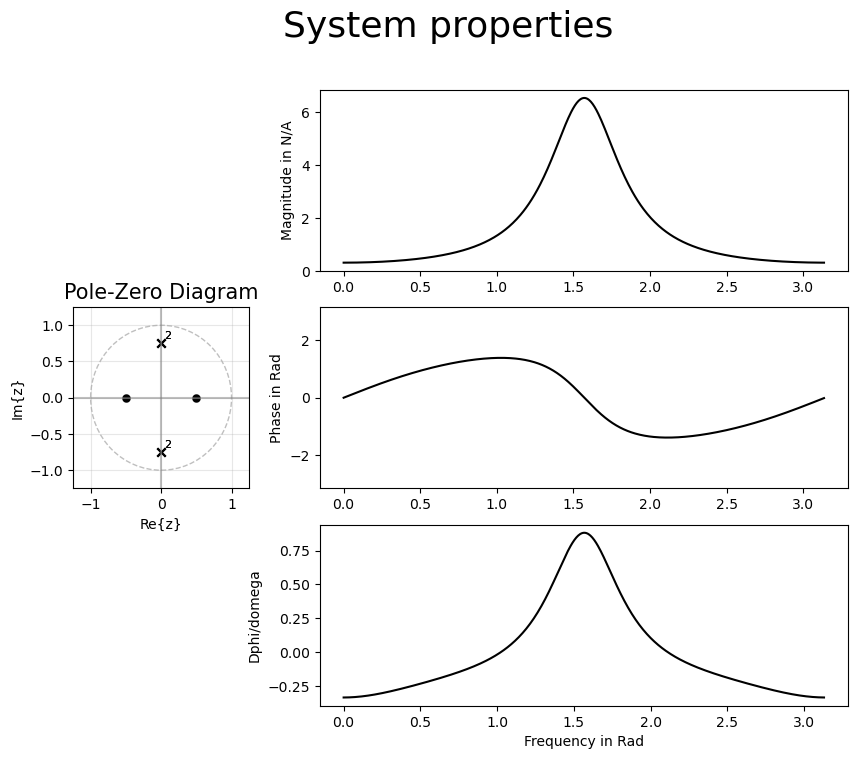

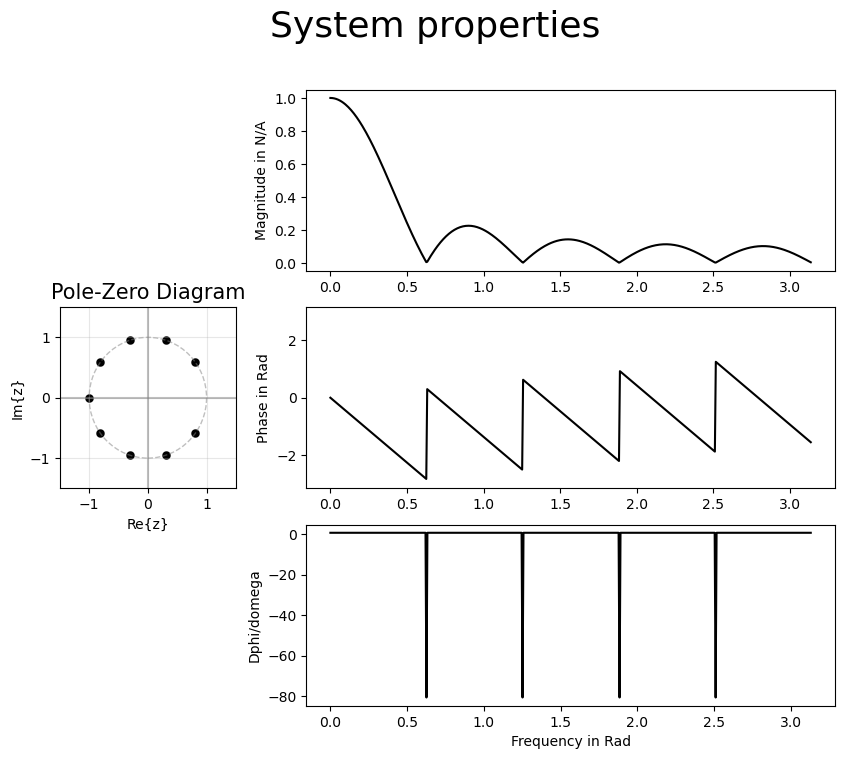

In [184]:
sys1 = ((0.5, -0.5),(0.75j, -0.75j, 0.75j, -0.75j), (1))
sys2 = ((0.1 * np.ones(10)),(1))

plot_system(system=sys1)

plot_system(system=sys2)

#plt.plot(zeros.real,zeros.imag, "ro")

# Aufgabe 2a) Filterkoeffizienten aus Nullstellen/Polstellen-Darstellung


Die Polstellen Darstellung einer z-Transformierten (für rechtsseitige funktionen) ist gegeben durch $H(z) = \frac{b_0}{a_0}\frac{\prod_{i = 1}^M(1-c_iz^{-1})}{\prod_{i = 1}^N (1-d_iz^{-1})}$

$H(z)$ kann als Polynom dargestellt $H(z) = K  \frac{\sum_{i=0}^n b_iz^{-i} }{1 +\sum_{i=1}^m a_iz^{-i}}$ mit  $a_0 = 1$ werden. Der Faktor $K$ wird als Gain beizeichnet. Und die koeffizienten $a_i$ und $b_i$ als die Filterkoeffizienten.



<br>
<br>
<br>
Gegeben sind 3 Systeme durch ihre Nullstellen, Polstellen und ihrem Gainfaktor:

$H_1(z) = 0.063\frac{(1-0.8z^{-1})^2}{(1-0.95z^{-1})^2} = \frac{0.063 - 0.1008z^{-1} + 0.04032z^{-2}}{1 - 1.9z^{-1} + 0.9025z^{-2}}$

$\Rightarrow b_0 = 0.063,\, b_1 = -0.1008, \,b_2 = 0.04032,\, a_0 = 1,\, a_1 = -1.9, \,a_2 = 0.9025 $

<br>



$H_2(z) = \frac{(1-0.95z^{-1})^2}{(1-0.8z^{-1})^2} = \frac{1 - 1.9z^{-1} + 0.9025z^{-2}}{1-1.6z^{-1}+0.64z^{-2} }$ 

$\Rightarrow b_0 = 1 , \, b_1 = -1.9, \,b_2 = 0.9025, \,a_0 = 1,\, a_1 = -1.6,\, a_2 = 0.64$

<br>

$H_3(z) = 0.45 \frac{(1 - \frac{j}{4}z^{-1})(1 + \frac{j}{4}z^{-1})}{(1 - \frac{3j}{4}z^{-1})(1 + \frac{3j}{4}z^{-1})} = \frac {0.45 + 0.028125 z^{-2}}{1 + \frac{9}{16}z^{-2}}$

$\Rightarrow b_0 = 1, \, b_1 = 0, \, b_2 = 0.028125, \, a_0 = 1, \, a_1 = 0, \, a_2 = \frac{9}{16}$




# Aufgabe 2 b) 

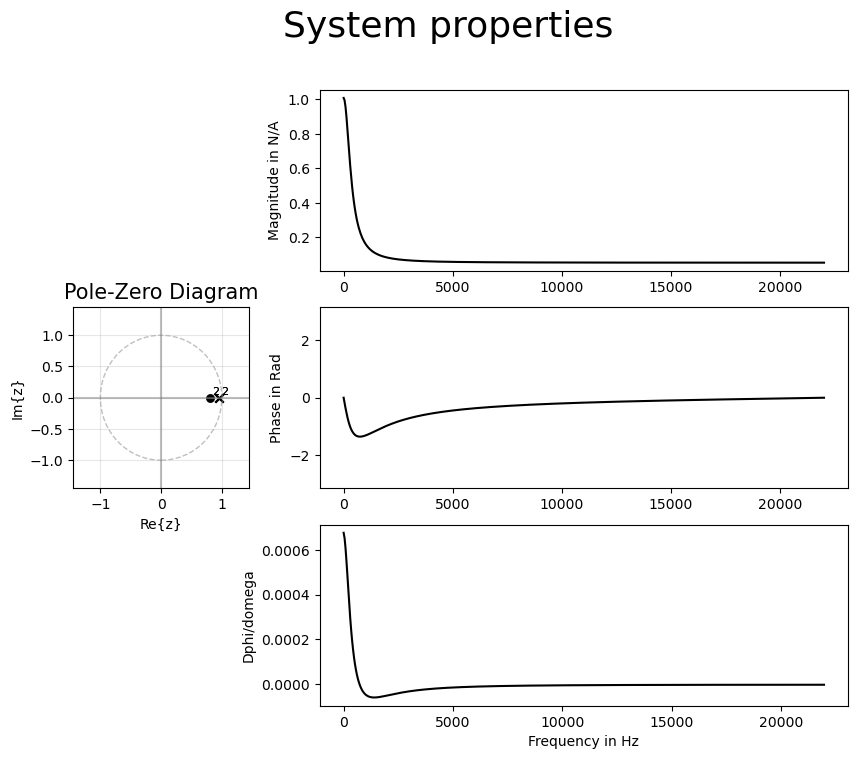

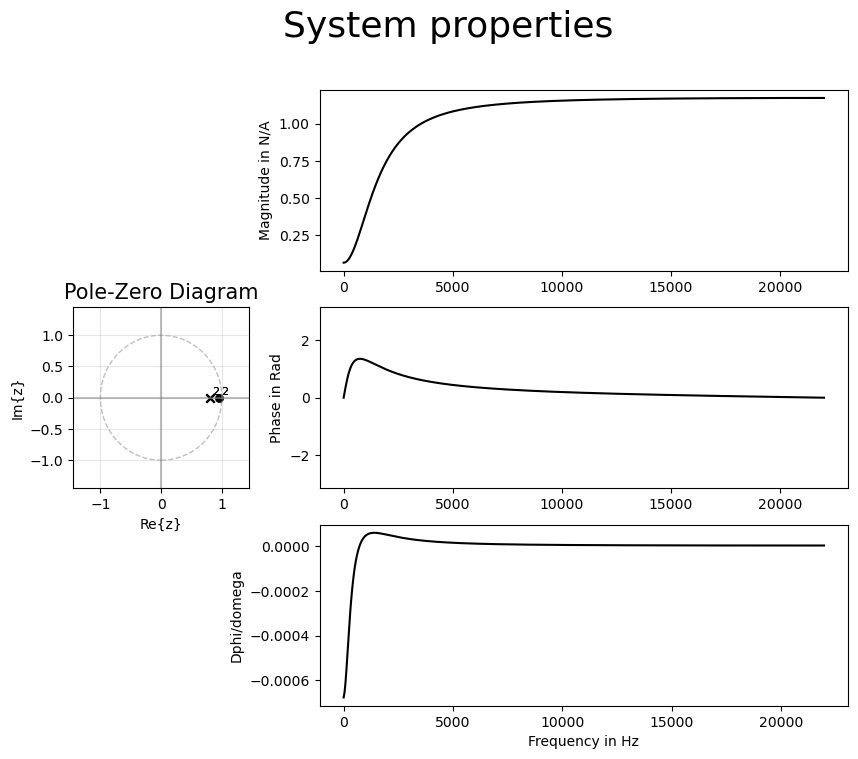

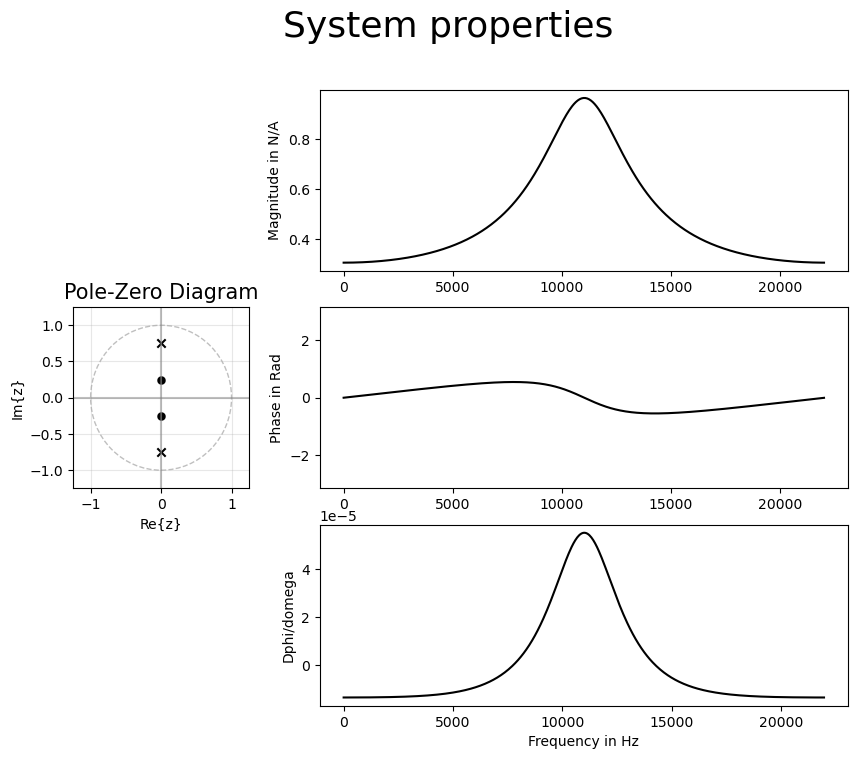

In [185]:
# Plots 
# format ((zeros),(poles),(gain))
sys1 = ((0.8,0.8),(0.95,0.95),(0.063))
sys2 = ((0.95,0.95),(0.8,0.8),(1))
sys3 = ((1/4j,-1/4j),(3/4j,-3/4j),(0.45))


plot_system(system=sys1, fs=44100)
plot_system(system=sys2, fs=44100)
plot_system(system=sys3, fs=44100)

# Aufgabe 2b) Diskussion 

Die Systeme lassen sich charakterisieren als
- System 1: Tiefpass Filter  
- System 2: Hochpass Filter
- System 3: Bandpass Filter 


Ungewöhnllich erscheint die negative Gruppenlaufzeit ? 
  

# Aufgabe 3 

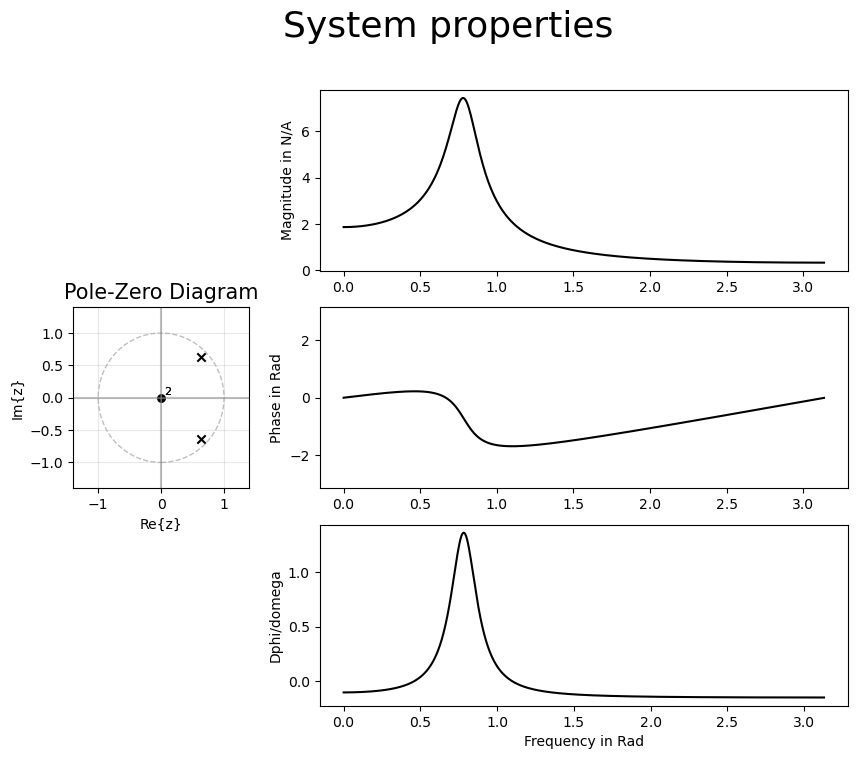

In [186]:
system1 = ((0,0),(.9*np.exp(1j*np.pi/4), .9*np.exp(-1j*np.pi/4)),(1))
system2 = ((0.9,-0.9,-0.9j,0.9j),(-2,2),(1))
system3 = ((1+1j, 1-1j,-1+1j, -1-1j),(0.25j,-0.25j),(1))
system4 = ((0.25+0.25j, 0.25-0.25j),(0.5j,),(1))


system11 = ((0, 2+2j),(0.25-0.25j,),(1))
system22 = ((1j,),(1j,),(1))
fs=44100

#plot_system(system=system1, fs=fs)
plot_system(system=system1)
#plot_system(system=system3, fs=fs)
#plot_system(system=system4, fs=fs)




$Oppenheim \, Wisdom:$

- Polstellen bei z = 0 haben keinen Einfluss auf den Amplitudengang
- nur Rechtsseitige Systeme sind Kausal 
- Stabilität ist nur gegeben, wenn der Einheitskreis $\in$ Konvergenzbereich
- Stabilität und Kausalität fordert, dass alle POLSTELLEN innerhalb des Einheitskreis. Nullstellen sind hierfür irrelaevant. 
- Wenn $H(z) $ und seine inverse $H_i(z)$ beide kausal und stabil sind, spricht man  von einem Minimalphasigen System 
- Bei Systemen 1. Ordnung fürhren nullsellen auf dem einheitskreis zu diskontinuitäten (Bandsperre)
- Polstellen liefern einen positiven beitrag zu $log|H(z)|$, Nullstellen einen negativen. Maximal wird dieser Beitrag für $r = 1$

#### System 1 $\Rightarrow$ Allpass

Ein Allpass Filter hat eine konstante, frequenzunabhängige Übertragungsfunktion. Die Anforderung an das System ist $ |H(e^{j\omega})| = 1 $.
Die einfachste Möglichkeit ist, die Nullstellen und Polstellen identisch zu wählen. So kürzen sie sich und wir erhalten einen konstanten Term. Da die Nullstelle bei $z=0$ in der Produktdarstellung nur mit einem Faktor $1$ in $H(z)$ eingeht, ist diese Nullstelle irrelevant.   


Eine möglichkeit wäre somit $z_n = [0, 0.25-0.25j] \, z_p=[0.25-0.25j]$



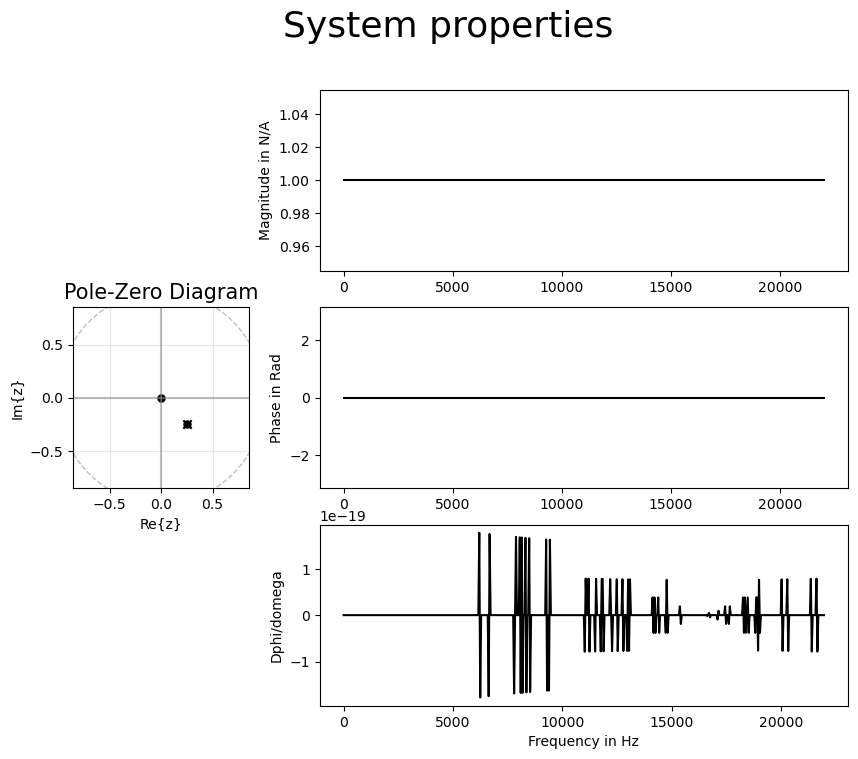

In [217]:
system1 = ((0, 0.25-0.25j),(.25-.25j,),(1))
plot_system(system=system1, fs= 44100) 

#### System 2 $\Rightarrow$ Stabiles System 
Stabilität ist nur gegeben, wenn der Einheitskreis $\in$ Konvergenzbereich, dann existiert die Fouriertransformierte, was impliziert, dass $|h[n]|< \infty $. Wir rücken dafür die Nullstellen durch Reduktion des Betrags auf $0.9$ in den Einheitskreis. Das System auf dem Ring von $z = 0.9$ bis $z = 2$ 


Bin ihc mir irgendwie noch nicht ganz schlüssig. gehen Nullstellen auf dem Einheitskreis? Muss für stabilität H(z) immer != 0 ?  
wie wählt überhaupt die sci.py funktion den definitionsbereich aus, da gibts ja immer mehrere.... 

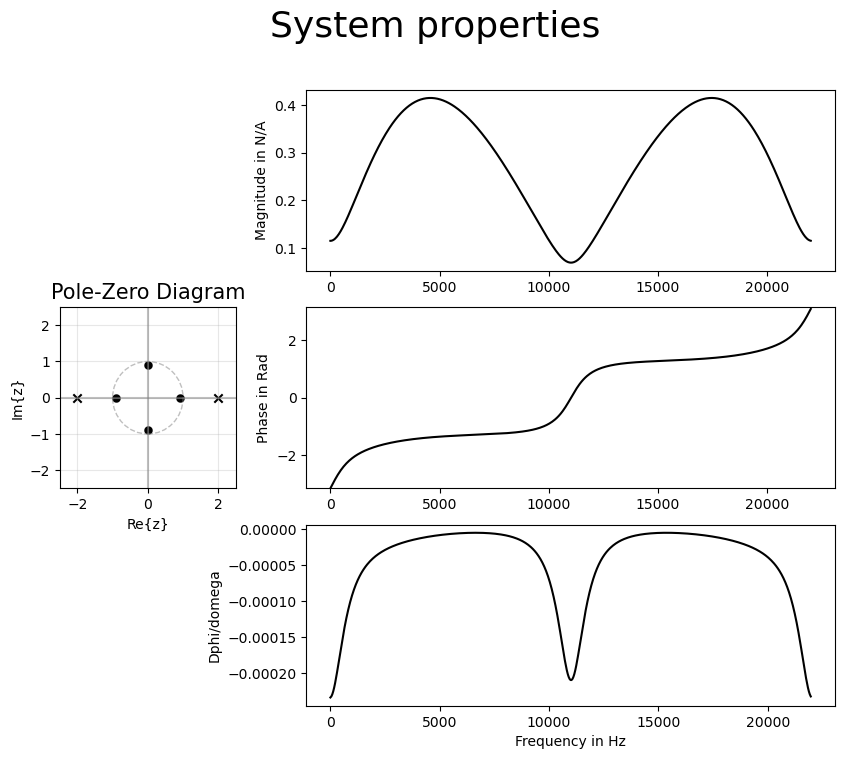

In [227]:
system2 = ((.9,-.9,-.9j,.9j),(-2,2),(1))
plot_system(system=system2, fs=44100)

#### System 3 $\Rightarrow$ Minimum Phase System 

Wenn $H(z) $ und seine Inverse $H_i(z)$ beide kausal und stabil sind, spricht man  von einem Minimalphasigen System.
Stabilität und Kausalität fordert, dass alle POLSTELLEN innerhalb des Einheitskreis. So sind jeweils die Polstellen von $H$ die Nullstellen von $H_i$ und umgekehrt. Deshalb ist wichtig, dass sowohl die Polstellen als auhc die Nullstellen von $H$ innerhalb des Einheitskreises liegen. 

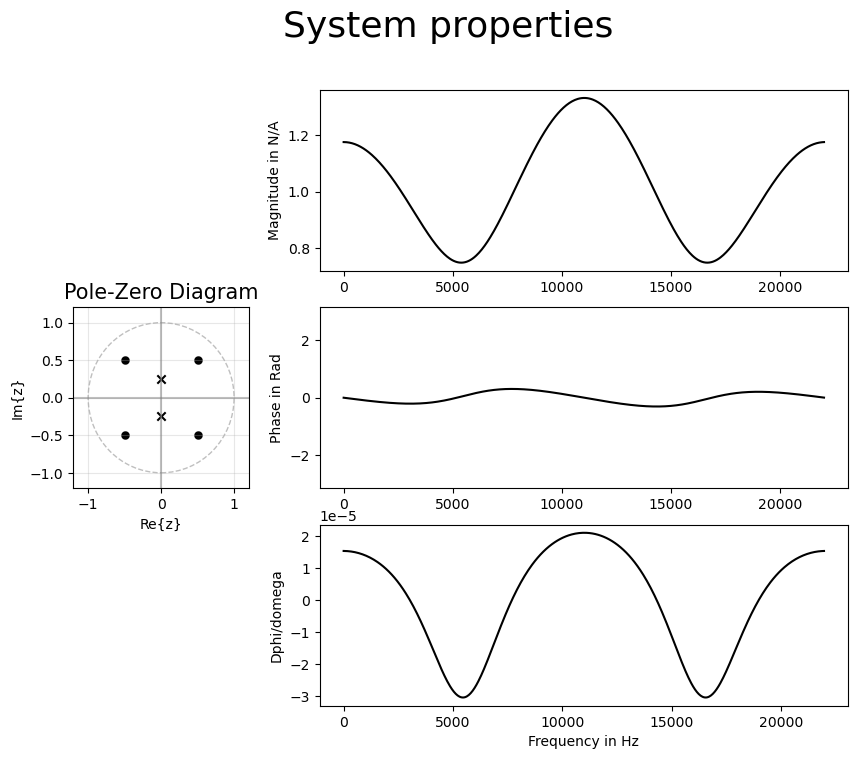

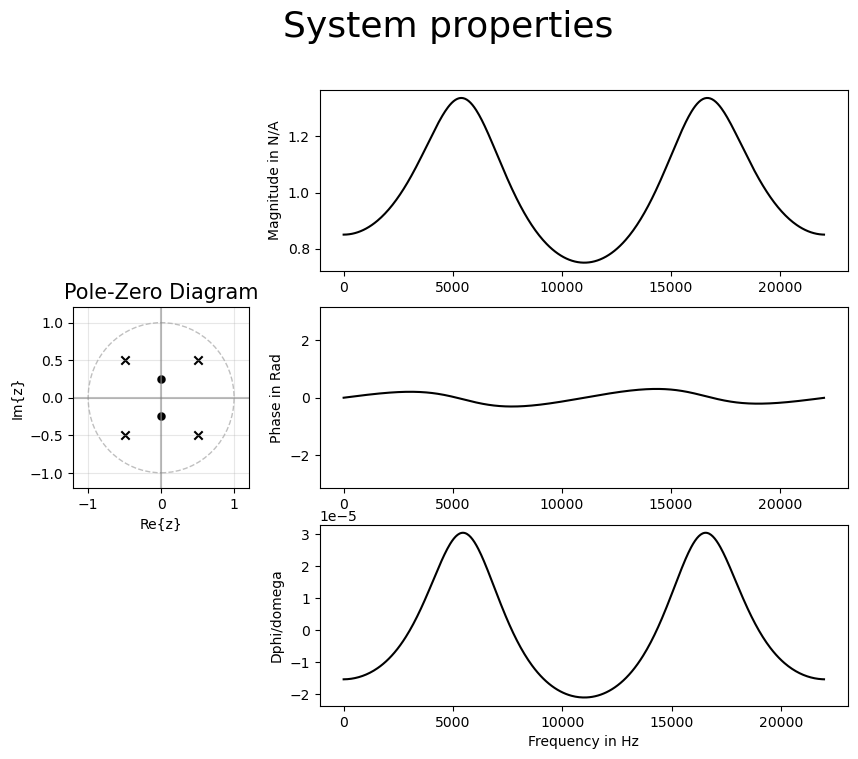

In [228]:
# System 3  ((1+1j, 1-1j,-1+1j, -1-1j),(0.25j,-0.25j),(1))


system3_neu     =   ((.5+.5j, .5-.5j,-.5+.5j, -.5-.5j),(0.25j,-0.25j),(1))
system3_neu_inv =   ((0.25j,-0.25j),(.5+.5j, .5-.5j,-.5+.5j, -.5-.5j),(1))
plot_system(system=system3_neu, fs=44100)
plot_system(system=system3_neu_inv, fs = 44100)

#### System 4 $ \Rightarrow h[n] \in \R$
Wie können wir aus System 4 erweitern um eine reelle Impulsantwort zu erhalten? 


Die Impulsantwort ist definitiv reell, wenn wir keine Polstellen haben und zu jeder komplexwertigen Nullstelle eine komplex konjugierte Nullstelle existier, da in der Produktdarstellung des Polynoms sich die Imaginärteile der Nullstellen jweils Parweise durch den Betragsbildung aufheben. Dann lässt sich die Systemfunktion schreiben als $H(z) = \sum_{i=0}^M a_i z^{-i}$ und die Impulsantwort lässt sich ablesen als $h[n] = \sum_{i =0}^M a_i \delta[n-i]$


System 4 wird durch das Streichen der Polstelle $z_p = 0.5j$  reellwertig und hat die Form $h[n] = \delta[n] - \frac{1}{2}\delta[n-1] + \frac{1}{8}\delta[n-2]$ 



<br><br>

Eine weitere möglichkeit könnte sein: Durch hinzufügen einer weiteren Polstelle. (?) Diese muss die komplexkonjugierte der bereits existierenden sein. (Fehlt noch der letzte Schritt im Beweis)

Wenn $ H(z) = \frac{\prod_{i=1}^M(1-c_iz^{-1})}{\prod_{i=1}^N(1-d_iz^{-1})} $ folgt unter den Annahmen dass $M = 2m $
und $ N= 2n$ sowie $d_i = d^*_{i+1}$ und $c_i = c^*_{i+1}$, dass  $H(z) = \frac{\prod_{i=1}^m(1-c_iz^{-1})(1-c^*_iz^{-1})}{\prod_{i=1}^n(1-d_iz^{-1})(1-d^*_iz^{-1})} = \frac{\prod_{i=1}^m(1-2\Re(c_i)z^{-1}+|c_i|^2z^{-2})}{\prod_{i=1}^n(1-2\Re(d_i)z^{-1}+|d_i|^2z^{-2})} $

Damit ist $H(z) \in \R$ und kann nach Partialbruchzerlegung in die Form $ H(z) = \sum $


 

 